To work with **tiff** images, the **pillow** (PIL) python library can be used. For **FITS**, **astropy** is the best library

In [1]:
from PIL import Image
from astropy.io import fits
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

# TIFF images ([documentation](https://pillow.readthedocs.io/en/5.1.x/))

## load data 

In [2]:
tiff_file = 'Data/Images/test_image.tiff'

open an instance to the data in the tiff file

In [3]:
tiff_in = Image.open(tiff_file)

change the tiff data to a numpy array

In [4]:
tiff_array=np.array(tiff_in)

In [5]:
np.shape(tiff_array)

(2048, 2048)

In [6]:
tiff_array.

SyntaxError: invalid syntax (<ipython-input-6-56256279faf4>, line 1)

<IPython.core.display.Javascript object>


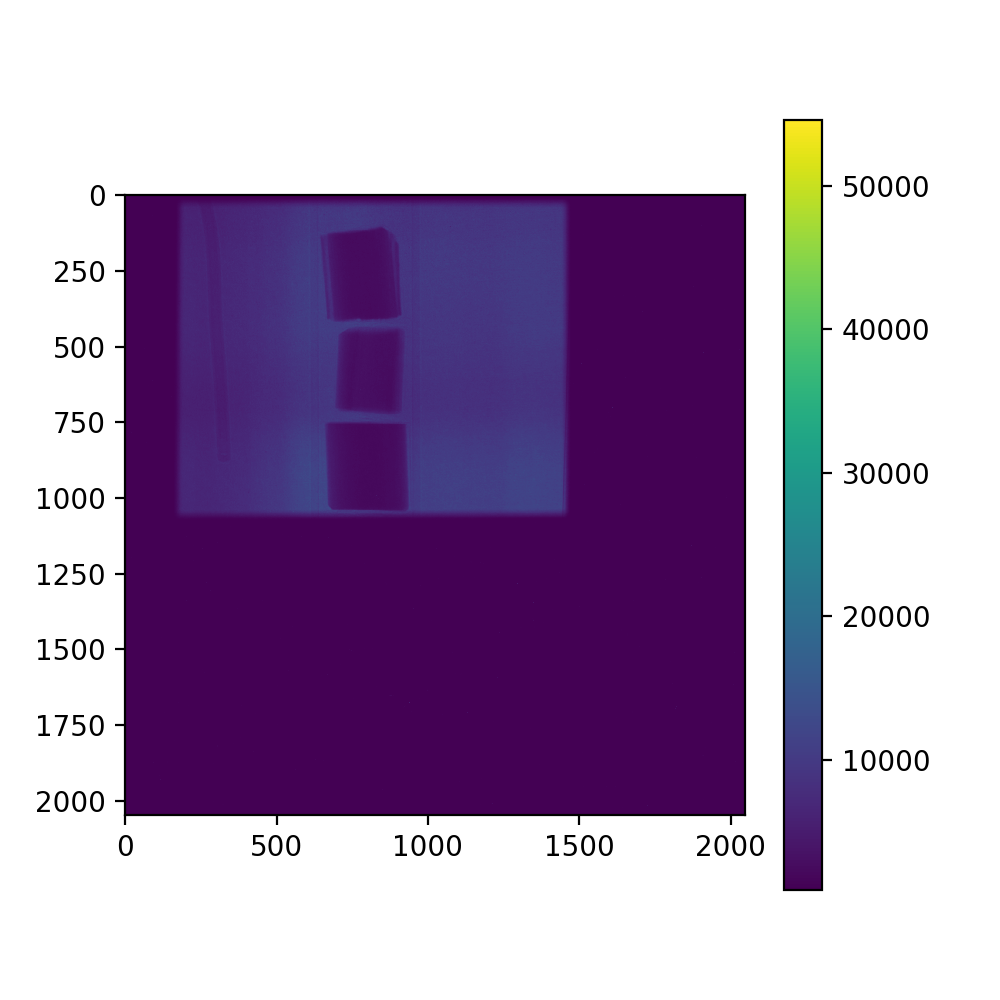

In [7]:
f,ax=plt.subplots(figsize=(5,5))
#plt.figure(figsize=(5,5))
cax=ax.imshow(tiff_array)
f.colorbar(cax)

Let's adjust the color limits, the color map and the x and y limits.
Use the ```<shift>+<tab>``` to see the options for imshow.
Use the set_xlim and set_ylim methods on the ax2 instance

<IPython.core.display.Javascript object>


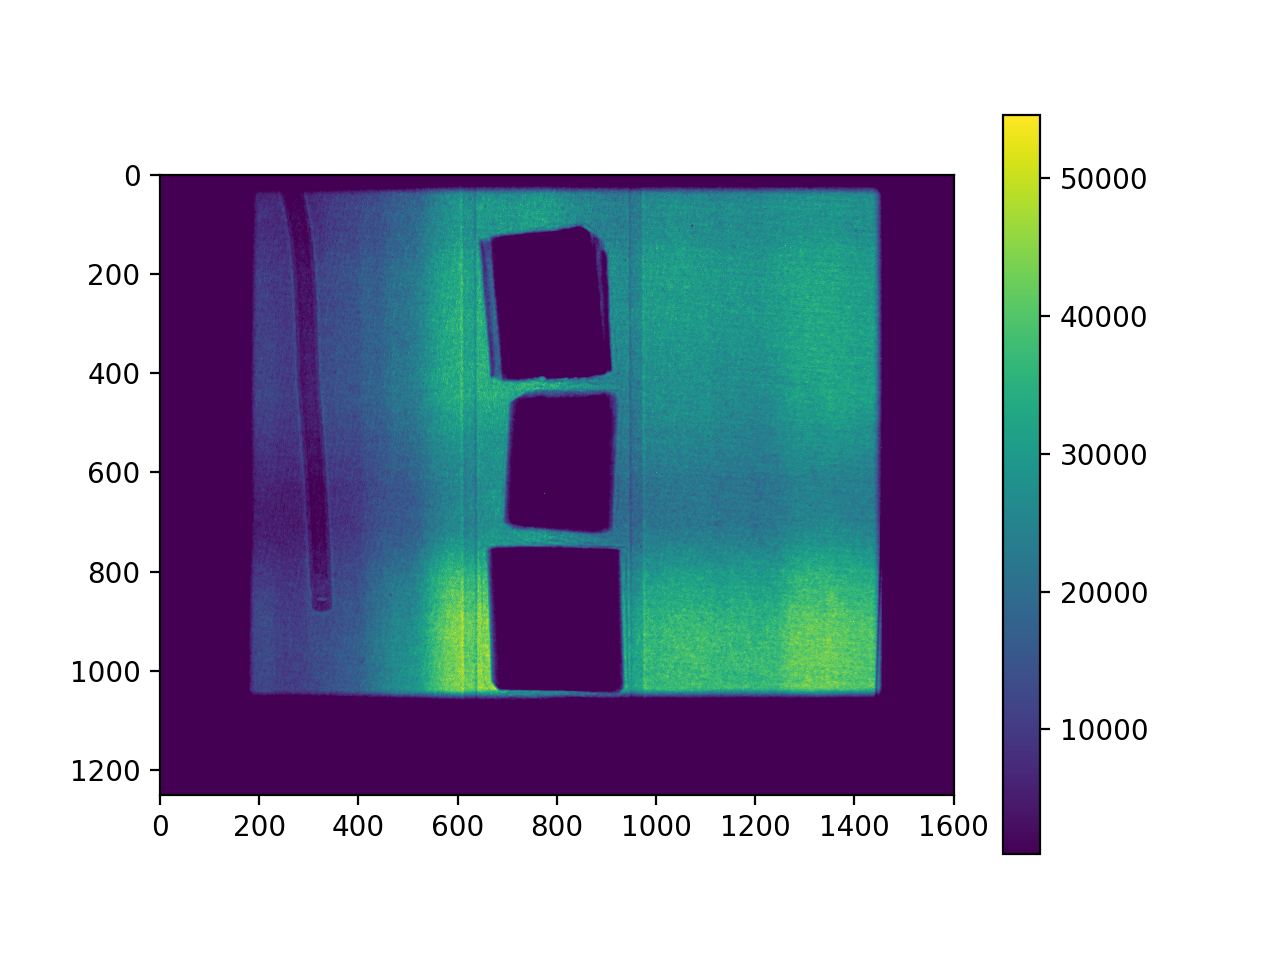

(0, 1600)

In [8]:
f2,ax2=plt.subplots()
cax2=ax2.imshow(tiff_array,vmin=5000)
f2.colorbar(cax)
ax2.set_ylim((1250,0))
ax2.set_xlim((0,1600))


## extract metadata 

In [9]:
from PIL.ExifTags import TAGS

Since we still have an instance to the tiff file, we can look at any of the Meta data

In [10]:
metadata = tiff_in.tag_v2

for _key, _value in metadata.items():
    print("{}: {}".format(_key, _value))


256: 2048
257: 2048
258: (16,)
259: 1
65028: SizeX:2048
65029: SizeY:2048
262: 1
65025: ImageCounter:132
65032: MotScanDeviceStr:Small Rot
65033: RotationActual:359.549920
65034: MotLiftTable.RBV:249.992768
65035: MotLiftTable:250.000000
65036: MotShortAxis.RBV:30.003000
65030: Temperature:-60.000000
65038: MotLongAxis.RBV:105.001000
271: Unknown
272: Unknown
273: (8,)
65042: MotSmallRotTable.RBV:359.549920
65037: MotShortAxis:30.000000
65044: MotZaberRot.RBV:-0.003056
277: 1
278: 2048
279: (8388608,)
65048: MotCameraVert.RBV:-51.699796
65049: MotCameraVert:-51.699796
65050: MotHoriTrans.RBV:28.000000
65051: MotHoriTrans:28.000000
284: 1
65053: MotVertTrans:60.000000
65054: MotDiffuser.RBV:86.300000
65055: MotDiffuser:86.300000
65056: MotAperture.RBV:189.700000
65057: MotAperture:189.700000
65058: MotSlitVB.RBV:5.000000
65059: MotSlitVB:5.000000
65060: MotSlitVT.RBV:32.000000
65052: MotVertTrans.RBV:60.000000
65062: MotSlitHR.RBV:20.000000
65063: MotSlitHR:20.000000
65064: MotSlitHL.RB

Let's do something with the meta data. 
First find the item key for the Furnace Temperature.  
Then let's split the string and convert the value into a string.

In [17]:
F_Temp_str=metadata[65070]

In [19]:
F_Temp_str.split(':')

['FurnaceSampleTemp', '380.100000']

In [20]:
F_Temp_str.split(':')[1]

'380.100000'

In [21]:
np.float(F_Temp_str.split(':')[1])

380.1

Be sure to close the link to the file

In [22]:
tiff_in.close()

# Fits  ([documentation](http://docs.astropy.org/en/stable/io/fits/))

## Load data 

In [15]:
fits_file = 'Data/Images/test_image.fits'

In [16]:
fits_array = fits.open(fits_file)[0].data

In [17]:
np.shape(fits_array)

(4096, 4096)

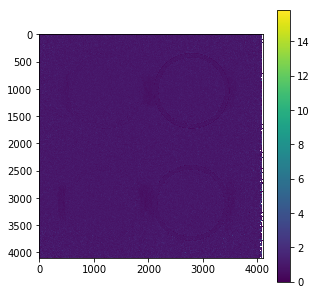

In [18]:
f2,ax2=plt.subplots(figsize=(5,5))
cax2=ax2.imshow(fits_array)
f2.colorbar(cax2)


## metadata 

In [13]:
metadata = fits.open(fits_file)[0]

In [14]:
metadata.header

SIMPLE  =                    T / Created by ImageJ FITS_Writer                  
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                 4096 / length of data axis 1                          
NAXIS2  =                 4096 / length of data axis 2                          
BZERO   =                    0 / data range offset                              
BSCALE  =                    1 / default scaling factor                         